# **1. Perkenalan Dataset**


### **Perkenalan Dataset: Bali Tourist Attractions Dataset from Google Maps**

#### **Deskripsi Dataset**

Dataset ini berisi informasi tentang tempat wisata di Bali yang dikumpulkan melalui scraping otomatis dari Google Maps. Dataset ini mencakup **761 tempat wisata** yang tersebar di **9 kabupaten/kota** di Pulau Bali. Tujuan dari dataset ini adalah untuk memberikan gambaran yang komprehensif tentang lokasi, kategori, dan popularitas destinasi wisata di Bali.

#### **Sumber Data**

Data dikumpulkan melalui **scraping otomatis** dari **Google Maps**. Rating dan link diperoleh langsung dari halaman tempat wisata masing-masing di Google Maps. Dataset ini mencakup berbagai kategori populer tempat wisata di Bali, mulai dari taman alam, pantai, situs budaya, hingga tempat wisata umum.

#### **Deskripsi Kolom**

* **nama**: Nama tempat wisata.
* **kategori**: Kategori/jenis tempat wisata (misalnya: Alam, Budaya, Rekreasi, Umum).
* **kabupaten\_kota**: Kabupaten atau kota tempat wisata tersebut berada.
* **rating**: Rating rata-rata pengunjung (skala 1-5).
* **preferensi**: Klasifikasi preferensi wisata (misalnya: Wisata Alam, Wisata Budaya).
* **link\_lokasi**: URL ke halaman lokasi tempat wisata di Google Maps.
* **latitude**: Koordinat latitude tempat wisata.
* **longitude**: Koordinat longitude tempat wisata.
* **link\_gambar**: URL gambar tempat wisata atau teks pengganti.

#### **Tujuan Dataset**

* Mendukung penelitian dan analisis terkait pariwisata Bali.
* Memfasilitasi pengembangan aplikasi berbasis peta dan rekomendasi wisata menggunakan data nyata.
* Membantu dalam pemetaan dan promosi destinasi wisata Bali secara lebih efektif.
* Menyediakan data komprehensif untuk pemerintah daerah dan pemangku kepentingan industri pariwisata.

#### **Contoh Data**

| nama                | kategori | kabupaten\_kota  | rating | preferensi      | link                                                    | latitude  | longitude   |
| ------------------- | -------- | ---------------- | ------ | --------------- | ------------------------------------------------------- | --------- | ----------- |
| Taman Mumbul Sangeh | Alam     | Kabupaten Badung | 4.6    | Wisata Alam     | [Link](https://www.google.com/maps/place/Taman+Mumbul)  | -8.483959 | 115.2122881 |
| Pantai Mengening    | Rekreasi | Kabupaten Badung | 4.7    | Wisata Rekreasi | [Link](https://www.google.com/maps/place/Pantai+Mengen) | -8.639532 | 115.1007188 |

#### **Cara Menggunakan Dataset**

* Dataset ini dapat diimpor dan digunakan dalam berbagai alat analisis data seperti Python (pandas), R, atau perangkat lunak GIS.
* Kolom **latitude** dan **longitude** dapat digunakan untuk memvisualisasikan tempat wisata di peta.
* Kolom **rating** dapat digunakan untuk analisis popularitas dan kualitas destinasi wisata.
* Kolom **kategori** dan **preferensi** dapat membantu dalam segmentasi jenis wisata.

#### **Lisensi**

Dataset ini disediakan untuk tujuan penelitian dan pengembangan aplikasi. Penggunaan dataset ini harus mematuhi kebijakan penggunaan data Google Maps dan menghormati hak kekayaan intelektual.

#### **Kontak**

Untuk pertanyaan atau diskusi lebih lanjut mengenai dataset ini, Anda dapat menghubungi:

* **Nama**: Bertnardo Mario Uskono
* **Email**: [bertnardouskono@gmail.com](mailto:bertnardouskono@gmail.com)

---

# **2. Import Library**

### Langkah 2: Import Library

Untuk memulai, kita perlu mengimpor pustaka (library) Python yang diperlukan untuk analisis data dan pembangunan model machine learning. Berikut adalah beberapa pustaka yang umum digunakan:

Pustaka-pustaka ini akan membantu dalam:
* **pandas** dan **numpy** untuk manipulasi data.
* **matplotlib** dan **seaborn** untuk visualisasi data.
* **mlflow** untuk pelacakan eksperimen dan manajemen model.
* **sklearn** untuk pembangunan dan evaluasi model machine learning.



In [6]:
!pip install mlflow --quiet

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# **3. Memuat Dataset**

### **Langkah 3: Memuat Dataset**

Sekarang, kita akan memuat dataset yang telah Anda pilih ke dalam notebook. Langkah ini sangat penting untuk memastikan bahwa dataset telah dimuat dengan benar dan dapat diproses lebih lanjut.

#### **Langkah 3.1: Memuat Dataset Menggunakan Pandas**

In [4]:
file_path = '/content/dataset_tempat_wisata_bali.csv'
df = pd.read_csv(file_path)

df.head()

,nama,kategori,kabupaten_kota,rating,preferensi,link_lokasi,latitude,longitude,link_gambar
0,Taman Mumbul Sangeh,Alam,Kabupaten Badung,4.6,Wisata Alam,https://www.google.com/maps/place/Taman+Mumbul...,-8.483959,115.212288,https://lh3.googleusercontent.com/p/AF1QipPniB...
1,Sangeh Monkey Forest,Alam,Kabupaten Badung,4.6,Wisata Alam,https://www.google.com/maps/place/Sangeh+Monke...,-8.481774,115.206739,https://lh3.googleusercontent.com/p/AF1QipN2_T...
2,Objek Wisata Sangeh,Umum,Kabupaten Badung,4.6,Wisata Umum,https://www.google.com/maps/place/Objek+Wisata...,-8.481566,115.206546,https://lh3.googleusercontent.com/p/AF1QipO1t7...
3,Satria Gatotkaca Park,Umum,Kabupaten Badung,4.6,Wisata Umum,https://www.google.com/maps/place/Satria+Gatot...,-8.744388,115.178867,https://lh3.googleusercontent.com/p/AF1QipP3kd...
4,Desa Wisata Penarungan,Umum,Kabupaten Badung,5.0,Wisata Umum,https://www.google.com/maps/place/Desa+Wisata+...,-8.539637,115.198893,https://lh3.googleusercontent.com/p/AF1QipO-JZ...



#### **Langkah 3.2: Memeriksa Dataset**

Setelah dataset dimuat, kita perlu memeriksa beberapa hal untuk memastikan data sudah benar:

1. **Struktur Dataset**: Pastikan kolom dan baris sudah benar.
2. **Tipe Data**: Pastikan tipe data pada setiap kolom sesuai (misalnya, kolom `rating` seharusnya bertipe float, `latitude` dan `longitude` seharusnya bertipe float).
3. **Missing Values**: Periksa apakah ada nilai yang hilang (missing) pada dataset.

In [5]:
print(df.info())

print(df.describe())

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nama            772 non-null    object 
 1   kategori        772 non-null    object 
 2   kabupaten_kota  772 non-null    object 
 3   rating          772 non-null    float64
 4   preferensi      772 non-null    object 
 5   link_lokasi     772 non-null    object 
 6   latitude        772 non-null    float64
 7   longitude       772 non-null    float64
 8   link_gambar     772 non-null    object 
dtypes: float64(3), object(6)
memory usage: 54.4+ KB
None
           rating    latitude   longitude
count  772.000000  772.000000  772.000000
mean     4.526702   -8.442346  115.205907
std      0.265078    0.176979    0.257539
min      3.000000   -8.848019  114.437595
25%      4.400000   -8.550947  115.100670
50%      4.563351   -8.449254  115.217261
75%      4.700000   -8.315404  115.360940
max    

### **Langkah 4: Exploratory Data Analysis (EDA)**

Setelah dataset berhasil dimuat, kita akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. Tujuan dari EDA adalah untuk mendapatkan wawasan tentang distribusi data, hubungan antar fitur, dan potensi masalah yang perlu diperbaiki (seperti missing values atau outliers).

#### **Langkah 4.1: Memvisualisasikan Distribusi Data**

Mari kita mulai dengan melihat distribusi data pada kolom-kolom penting, seperti **rating**, **kategori**, dan **preferensi**.


 **Tujuan**: Memahami sebaran nilai rating tempat wisata dan melihat apakah ada rating yang sangat rendah atau tinggi.

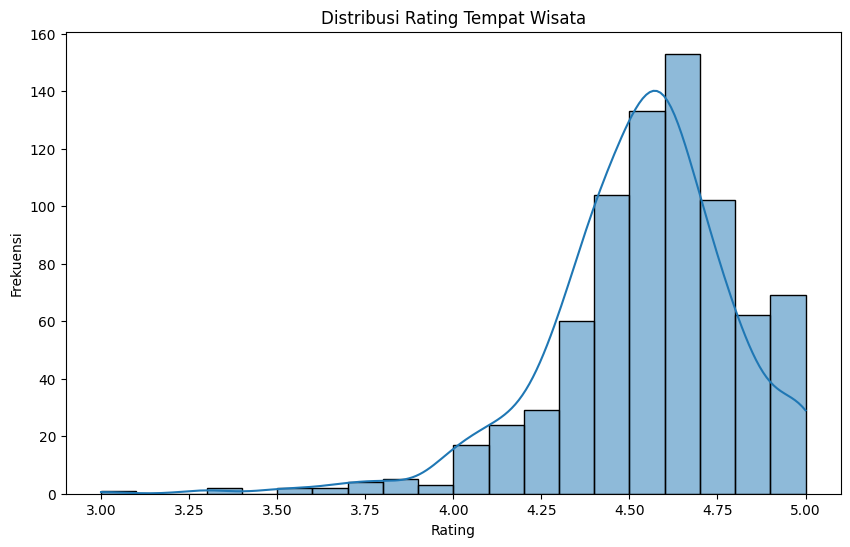

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Distribusi Rating Tempat Wisata')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()

#### **Langkah 4.2: Menghitung Jumlah Unik pada Kolom Kategorikal**

Untuk kolom kategorikal seperti **kategori** dan **preferensi**, kita ingin mengetahui jumlah kategori unik yang ada dalam dataset.

**Tujuan**: Memastikan bahwa kategori yang ada dalam dataset tidak ada kesalahan atau duplikasi yang tidak sesuai.

In [8]:
# Menampilkan jumlah kategori unik pada kolom 'kategori' dan 'preferensi'
print("Jumlah kategori unik di 'kategori':", df['kategori'].nunique())
print("Jumlah kategori unik di 'preferensi':", df['preferensi'].nunique())

Jumlah kategori unik di 'kategori': 4
Jumlah kategori unik di 'preferensi': 4


#### **Langkah 4.3: Memeriksa Nilai Missing**

Setelah itu, kita perlu memeriksa kolom mana saja yang memiliki nilai hilang (missing values) dan berapa banyaknya. Ini penting untuk memutuskan apakah kita perlu menghapus atau mengisi nilai yang hilang tersebut.

**Tujuan**: Mengetahui kolom mana yang memiliki nilai hilang, sehingga kita bisa mengambil keputusan apakah harus menghapus atau mengisi nilai yang hilang tersebut.

In [9]:
# Memeriksa nilai yang hilang pada setiap kolom
missing_values = df.isnull().sum()
print(missing_values)

nama              0
kategori          0
kabupaten_kota    0
rating            0
preferensi        0
link_lokasi       0
latitude          0
longitude         0
link_gambar       0
dtype: int64


#### **Langkah 4.4: Analisis Kolom Kategorikal**

Kita juga dapat memvisualisasikan distribusi dari kolom kategorikal seperti **kategori** dan **preferensi** menggunakan grafik batang.

 **Tujuan**: Memahami seberapa banyak tempat wisata yang termasuk dalam masing-masing kategori.

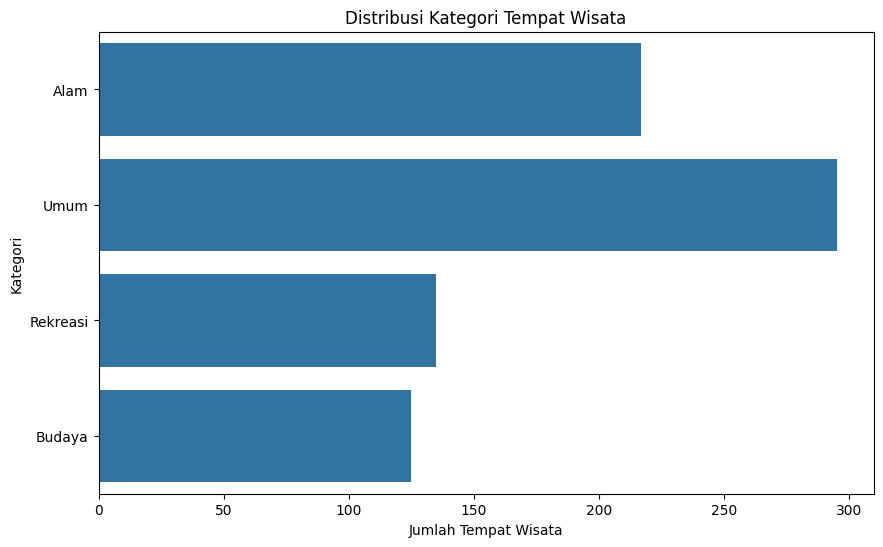

In [10]:
# Visualisasi distribusi kategori tempat wisata
plt.figure(figsize=(10, 6))
sns.countplot(y='kategori', data=df)
plt.title('Distribusi Kategori Tempat Wisata')
plt.xlabel('Jumlah Tempat Wisata')
plt.ylabel('Kategori')
plt.show()

#### **Langkah 4.5: Korelasi Antar Fitur**

Selanjutnya, kita ingin melihat korelasi antara fitur numerik, seperti **rating**, **latitude**, dan **longitude**. Ini bisa memberi wawasan tentang bagaimana beberapa fitur berhubungan satu sama lain.

**Tujuan**: Memahami hubungan antara fitur numerik dan apakah ada korelasi yang signifikan yang bisa dimanfaatkan.

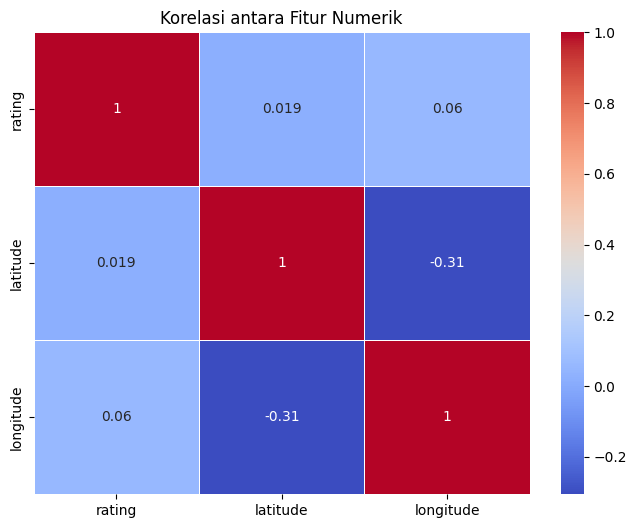

In [11]:
# Memeriksa korelasi antara fitur numerik
corr = df[['rating', 'latitude', 'longitude']].corr()

# Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi antara Fitur Numerik')
plt.show()

#### **Langkah 4.6: Menangani Outliers**

Jika diperlukan, kita dapat memeriksa apakah ada **outliers** pada kolom numerik, seperti **rating** atau **latitude** dan **longitude**. Ini penting untuk menjaga kualitas model yang akan dibangun nanti.

 **Tujuan**: Mengidentifikasi nilai yang jauh lebih tinggi atau rendah dari nilai umum pada kolom **rating**, yang bisa menjadi outliers.

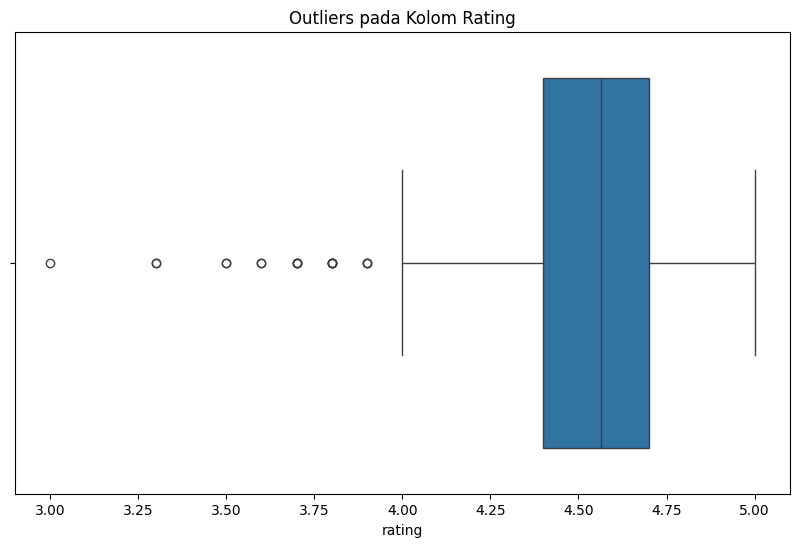

In [12]:
# Boxplot untuk memeriksa outliers pada kolom rating
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['rating'])
plt.title('Outliers pada Kolom Rating')
plt.show()

### **Langkah 4.7: Menyimpulkan Hasil EDA**

Setelah melakukan **Exploratory Data Analysis (EDA)**, kita harus membuat **kesimpulan** mengenai dataset ini. Beberapa poin yang perlu diperhatikan:

* **Data sudah bersih**, tanpa missing values, sehingga tidak perlu langkah imputation.
* Kolom-kolom seperti **latitude**, **longitude**, **kategori**, dan **preferensi** sangat relevan dan akan berguna untuk analisis dan pemodelan.
* **Outliers** pada kolom **rating** tidak perlu dihapus secara otomatis karena bisa jadi informasi berharga.
* Tidak ada korelasi yang kuat antar fitur numerik, tetapi **semua fitur** masih bisa dimanfaatkan untuk pemodelan.

# **5. Data Preprocessing**

### **Langkah 5: Data Preprocessing**

Pada tahap ini, kita akan mempersiapkan data agar siap digunakan dalam pelatihan model machine learning. Proses **Data Preprocessing** melibatkan beberapa langkah untuk memastikan kualitas data yang optimal, serta untuk menangani masalah seperti nilai yang hilang, duplikasi, dan outliers.

Berikut adalah tahapan yang perlu dilakukan untuk preprocessing data Anda.

---

#### **Langkah 5.1: Menghapus atau Menangani Data Kosong (Missing Values)**

Meskipun pada tahap **EDA** kita telah memeriksa apakah ada missing values dan kita tahu bahwa dataset kita tidak mengandung nilai yang hilang, namun penting untuk melakukan pengecekan tambahan dan mempersiapkan cara untuk menangani missing values di masa depan.

Jika ada nilai yang hilang, Anda bisa:

* **Menghapus** baris dengan missing values.
* **Mengisi** missing values dengan nilai tertentu (misalnya, rata-rata untuk fitur numerik atau modus untuk fitur kategorikal).

Contoh kode:

In [14]:
# Menghapus baris dengan missing values (jika ada)
df_cleaned = df.dropna()

# Atau mengisi missing values dengan nilai tertentu
df['rating'].fillna(df['rating'].mean(), inplace=True)  # Mengisi nilai hilang pada kolom 'rating' dengan rata-rata

/tmp/ipython-input-14-911826475.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(df['rating'].mean(), inplace=True)  # Mengisi nilai hilang pada kolom 'rating' dengan rata-rata


#### **Langkah 5.2: Menghapus Data Duplikat**

Data duplikat dapat mengganggu analisis dan kualitas model. Oleh karena itu, kita perlu memeriksa dan menghapus duplikat jika ada.


In [15]:
# Menghapus duplikat
df_cleaned = df.drop_duplicates()

#### **Langkah 5.3: Normalisasi atau Standarisasi Fitur**

Untuk model seperti **KNN** atau **SVM**, fitur numerik perlu dinormalisasi atau distandarisasi agar model dapat bekerja dengan optimal. Di sini, kita akan menggunakan **StandardScaler** dari **scikit-learn** untuk melakukan standarisasi data numerik seperti **rating**, **latitude**, dan **longitude**.

**Tujuan**: Memastikan bahwa semua fitur numerik berada dalam skala yang sama agar model machine learning tidak terpengaruh oleh perbedaan skala antar fitur.



In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['rating', 'latitude', 'longitude']] = scaler.fit_transform(df[['rating', 'latitude', 'longitude']])

#### **Langkah 5.4: Deteksi dan Penanganan Outlier**

Jika diperlukan, kita dapat memeriksa dan menangani outliers di kolom **rating**, **latitude**, dan **longitude**.

Sebagai contoh, kita bisa menggunakan **IQR (Interquartile Range)** untuk mendeteksi outliers. Jika ada outliers yang tidak relevan, kita bisa menghapusnya.

In [17]:
# Menggunakan IQR untuk mendeteksi outliers pada kolom rating
Q1 = df['rating'].quantile(0.25)
Q3 = df['rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df['rating'] >= lower_bound) & (df['rating'] <= upper_bound)]

#### **Langkah 5.5: Encoding Data Kategorikal**

Beberapa kolom, seperti **kategori** dan **preferensi**, berisi data kategorikal. Kita perlu mengonversi data kategorikal menjadi format numerik agar dapat digunakan dalam model machine learning.

Contoh menggunakan **Label Encoding** untuk mengubah data kategorikal menjadi numerik:

In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Mengubah kategori dan preferensi menjadi numerik
df['kategori'] = encoder.fit_transform(df['kategori'])
df['preferensi'] = encoder.fit_transform(df['preferensi'])

Jika kolom memiliki banyak kategori, Anda bisa menggunakan **One-Hot Encoding** untuk menghindari penurunan kinerja model.

In [19]:
# Menggunakan One-Hot Encoding pada kolom kategorikal
df = pd.get_dummies(df, columns=['kategori', 'preferensi'])

#### **Langkah 5.6: Binning (Pengelompokan Data)**

Jika diperlukan, Anda bisa melakukan **binning** (pengelompokan data) untuk mengubah fitur numerik menjadi kategori. Misalnya, mengelompokkan **rating** menjadi beberapa kategori seperti "Rendah", "Menengah", dan "Tinggi".

In [20]:
# Membuat bin untuk rating
bins = [0, 2.5, 4, 5]
labels = ['Rendah', 'Menengah', 'Tinggi']
df['rating_binned'] = pd.cut(df['rating'], bins=bins, labels=labels)

In [21]:
# Menyimpan dataset hasil preprocessing ke dalam file CSV
df_cleaned.to_csv('bali_tourist_attractions_preprocessed.csv', index=False)


### **Kesimpulan dari Tahapan Preprocessing**

* **Missing Values**: Tidak ada nilai yang hilang dalam dataset ini, tetapi jika ditemukan nilai hilang, kita dapat memilih untuk menghapus atau mengisi nilai hilang.
* **Data Duplikat**: Kita telah menghapus baris duplikat.
* **Normalisasi/Standarisasi**: Fitur numerik sudah dinormalisasi menggunakan **StandardScaler**.
* **Outliers**: Outliers pada **rating** sudah ditangani dengan menggunakan metode **IQR**.
* **Encoding**: Kolom **kategori** dan **preferensi** telah diencode menggunakan **LabelEncoder** dan **One-Hot Encoding** jika diperlukan.
* **Binning**: Kolom **rating** sudah dikelompokkan menjadi kategori **Rendah**, **Menengah**, dan **Tinggi**.

---